# Cleaning the dataset

In [38]:
import os

#import all needed packages
#there may be some doubles in here

%matplotlib inline

from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression # Importing Classifier Step
from sklearn.metrics import classification_report
from sklearn import metrics
from collections import Counter # counter takes values returns value_counts dictionary


# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from xgboost import XGBRegressor

%matplotlib inline


#set settings so we can see every row and column
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the original dataset and read the first few rows

In [39]:
os.getcwd()
os.chdir('/Users/michellemak/Google Drive/Tilburg University/Master/Master Thesis/Code/Data/Raw data/')
os.getcwd() 

waves = pd.read_csv('waves.csv', low_memory=False)
waves.head()

,KeyID,Geslacht,Leeftijd,Woonplaats,Invuldatum,Donatiedatum,DonatieDatumEnq,DagenNaDonatie,Donatiesoortcode,DonatieStatusCode,volume,OD.CO,Covid_result,Covid_result_repeat,StartDate,EndDate,ResponseType,Progress,Duration__in_seconds_,Finished,DistributionChannel,Toestemming_1,Toestemming_2,Toestemming_3,Toestemming_4,Toestemming_5,Toestemming_6,Akkoord_1,Akkoord_2,Akkoord_3,Akkoord_4,Akkoord_5,Akkoord_6,Akkoord_7,Vervolgonderzoek,Opmerkingen,Afnamelocatie,Huishouden,Huishouden_anders,ThuiswonendeKinderen_0-3,ThuiswonendeKinderen_4-12,ThuiswonendeKinderen_13-17,ThuiswonendeKinderen_18+,HoogsteOpleiding,CruciaalBeroep,DirectContact,DirectContactMetCovid,NormaleWeek_Thuiswerken,NormaleWeek_Buitenshuiswerken,Normaleweek_Nietwerken,CoronaWeek_Thuiswerken,CoronaWeek_Buitenshuiswerk,CoronaWeek_Nietwerken,HoeveelPersonenContact,HoeContact,Uitspraak_GemakkelijkerZiek,Uitspraak_NetZoGezond,Uitspraak_GezondheidGaatAchteruitVerwachting,Uitspraak_GezondheidUitstekend,Klacht_Neusverkoudheid,Klacht_Keelpijn,Klacht_DrogeHoest,Klacht_Vermoedheid,Klacht_SlijmHoest,Klacht_SpierGewrichtspijn,Klacht_Hoofdpijn,Klacht_Koorts,Klacht_Kortademig,Klacht_Diarree,Klacht_Misselijkheid,Klacht_Overgeven,Klacht_Rillingen,Klacht_Niezen,Klacht_Huiduitslag,Klacht_Verward,Klacht_VerslapteSpieren,Klacht_GeenReukSmaak,BeginKlachten,EindKlachten,ArtsGeweest,Getest,DatumGetest,RIVM_HandenWassen,RIVM_GrondigHandenWassen,RIVM_GeenHandenSchudden,RIVM_PapierZakdoek,RIVM_Elleboog,RIVM_ThuisblijvenSymptomen,RIVM_Thuiswerken,RIVM_1.5mAfstand,RIVM_VermijdenGroepen,Effectief_HandenWassen,Effectief_GrondigHandenWassen,Effectief_GeenHandenSchudden,Effectief_PapierenZakdoek,Effectief_Elleboog,Effectief_ThuisblijvenSymptomen,Effectief_Thuiswerken,Effectief_1.5mAfstand,Effectief_VermijdenGroepen,Effectief_SluitingScholen,Effectief_SluitingHoreca,Effectief_VerbiedenEvenementen,Extra_Niets,Extra_OpenbaarVermijden,Extra_WinkelsVermijden,Extra_Schoonmaak,Extra_DesinfectieGebruik,Extra_DesinfectieGelDragen,Extra_Gezichtsmasker,Extra_Supplementen,Extra_ContactMinimaliseren,Extra_GezondEten,Extra_Anders,Extra_Anders_text,TweedeOnderzoek,Corona_ZonderKlachten,Stelling_WeinigControle,Stelling_ZonderMaatregelenGrotereKans,Stelling_SerieuzeZiekte,Stelling_GroteGevolgen,Stelling_MildeZiekte,Stelling_NietVeelEffect,Stelling_ProblemenOmgeving,Stelling_OverspoeldMetInformatie,MinutenAandacht,SocialeActiviteiten_Vermijden,WinkelsSluiten,ReactieOverheid,ReactieBevolking,VertrouwenOverheid,EerlijkOverheid,VertrouwenArtsen,VertrouwenGezondheidssysteem,Stelling_Gespannen,Stelling_KalmOntspannen,Stelling_Zorgen,Stelling_ZorgenFamilie,Stelling_GespannenVerlatenHuis,Bezorgd_ZelfCovid,Bezorgd_CovidInRegio,Bezorgd_CovidVolksgezondheidsprobleem,Donoren_AnderenHelpen,Doneren_ToekomstMisschienNodig,Donoren_VerantwoordelijkBloedvoorraad,Doneren_EigenGezondheid,Doneren_Zwaarder1,Doneren_Zwaarder2,Doneren_Zwaarder3,Doneren_Zwaarder4,Doneren_Zwaarder5,Doneren_Zwaarder6,Vraag_MensenZijnTeVertrouwen,Vraag_NietTeVoorzichtigZijn,Vraag_LieverEigenWelzijn,Vraag_VerbeterenWelzijnMaatschappij,Vraag_WeinigOmTeHelpen,Vraag_BelangrijkAnderenHelpen,Vraag_BelangrijkArmenTeHelpen,Donor_oproep,Donor_CoronaHelpen,Donor_PlasmaInzameling,Donor_NietNaarWerk,Donor_NietErgAlsBesmet,Donor_AlGehad,Donor_GetestOpCorona,Donor_NietMogelijkVerspreiden,Donor_HuisUit,Donor_Anders,TotaleTijd
0,31689496.0,F,46.0,S-GRAVENHAGE,2020-05-25,2020-05-18,2020-05-18,7.0,P,-,4.0,20.86,pos,waarde hh of duplo,2020-05-25 15:16:16,2020-05-25 15:27:49,0.0,100.0,692.0,1.0,anonymous,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,145.0,4.0,NaN,0.0,0.0,2.0,1.0,5.0,1.0,NaN,NaN,1.0,4.0,2.0,5.0,0.0,2.0,NaN,NaN,1.0,5.0,1.0,5.0,1.0,1.0,5.0,5.0,3.0,3.0,2.0,5.0,4.0,1.0,1.0,1.0,5.0,2.0,1.0,1.0,2.0,5.0,17/03/2020,5.0,1.0,1.0,NaN,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

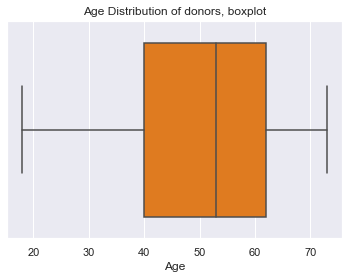

In [40]:
#boxplot for age
sns.boxplot(x=waves['Leeftijd'], color='#ff7900').set(xlabel = "Age")
plt.title('Age Distribution of donors, boxplot')
plt.savefig('boxplot_age.eps')

### Change the date column to the correct datetype

In [42]:
waves['Donatiedatum'] = pd.to_datetime(waves['Donatiedatum'])

In [43]:
waves['Donatiedatum_cat'] = waves['Donatiedatum'].astype('category')
waves['Donatiedatum_codes'] = waves['Donatiedatum_cat'].cat.codes

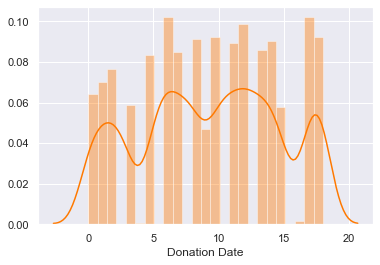

In [44]:
#plot for donation dates
sns.set()
ax = sns.distplot(waves['Donatiedatum_codes'],color='#ff7900').set(xlabel="Donation Date")

In [45]:
#dates = waves['Donatiedatum_cat'].unique().tolist()
#dates = ['2020-05-18', '2020-05-14', '2020-05-13', '2020-05-15', '2020-05-11', '2020-05-12', '2020-04-06',
#       '2020-04-07', '2020-04-02', '2020-04-01','2020-04-14', '2020-11-09', '2020-11-06', '2020-11-05',
 #       '2020-11-04', '2020-11-02', '2020-11-03', '2020-11-10', '2020-11-07']

In [46]:
waves.head()

,KeyID,Geslacht,Leeftijd,Woonplaats,Invuldatum,Donatiedatum,DonatieDatumEnq,DagenNaDonatie,Donatiesoortcode,DonatieStatusCode,volume,OD.CO,Covid_result,Covid_result_repeat,StartDate,EndDate,ResponseType,Progress,Duration__in_seconds_,Finished,DistributionChannel,Toestemming_1,Toestemming_2,Toestemming_3,Toestemming_4,Toestemming_5,Toestemming_6,Akkoord_1,Akkoord_2,Akkoord_3,Akkoord_4,Akkoord_5,Akkoord_6,Akkoord_7,Vervolgonderzoek,Opmerkingen,Afnamelocatie,Huishouden,Huishouden_anders,ThuiswonendeKinderen_0-3,ThuiswonendeKinderen_4-12,ThuiswonendeKinderen_13-17,ThuiswonendeKinderen_18+,HoogsteOpleiding,CruciaalBeroep,DirectContact,DirectContactMetCovid,NormaleWeek_Thuiswerken,NormaleWeek_Buitenshuiswerken,Normaleweek_Nietwerken,CoronaWeek_Thuiswerken,CoronaWeek_Buitenshuiswerk,CoronaWeek_Nietwerken,HoeveelPersonenContact,HoeContact,Uitspraak_GemakkelijkerZiek,Uitspraak_NetZoGezond,Uitspraak_GezondheidGaatAchteruitVerwachting,Uitspraak_GezondheidUitstekend,Klacht_Neusverkoudheid,Klacht_Keelpijn,Klacht_DrogeHoest,Klacht_Vermoedheid,Klacht_SlijmHoest,Klacht_SpierGewrichtspijn,Klacht_Hoofdpijn,Klacht_Koorts,Klacht_Kortademig,Klacht_Diarree,Klacht_Misselijkheid,Klacht_Overgeven,Klacht_Rillingen,Klacht_Niezen,Klacht_Huiduitslag,Klacht_Verward,Klacht_VerslapteSpieren,Klacht_GeenReukSmaak,BeginKlachten,EindKlachten,ArtsGeweest,Getest,DatumGetest,RIVM_HandenWassen,RIVM_GrondigHandenWassen,RIVM_GeenHandenSchudden,RIVM_PapierZakdoek,RIVM_Elleboog,RIVM_ThuisblijvenSymptomen,RIVM_Thuiswerken,RIVM_1.5mAfstand,RIVM_VermijdenGroepen,Effectief_HandenWassen,Effectief_GrondigHandenWassen,Effectief_GeenHandenSchudden,Effectief_PapierenZakdoek,Effectief_Elleboog,Effectief_ThuisblijvenSymptomen,Effectief_Thuiswerken,Effectief_1.5mAfstand,Effectief_VermijdenGroepen,Effectief_SluitingScholen,Effectief_SluitingHoreca,Effectief_VerbiedenEvenementen,Extra_Niets,Extra_OpenbaarVermijden,Extra_WinkelsVermijden,Extra_Schoonmaak,Extra_DesinfectieGebruik,Extra_DesinfectieGelDragen,Extra_Gezichtsmasker,Extra_Supplementen,Extra_ContactMinimaliseren,Extra_GezondEten,Extra_Anders,Extra_Anders_text,TweedeOnderzoek,Corona_ZonderKlachten,Stelling_WeinigControle,Stelling_ZonderMaatregelenGrotereKans,Stelling_SerieuzeZiekte,Stelling_GroteGevolgen,Stelling_MildeZiekte,Stelling_NietVeelEffect,Stelling_ProblemenOmgeving,Stelling_OverspoeldMetInformatie,MinutenAandacht,SocialeActiviteiten_Vermijden,WinkelsSluiten,ReactieOverheid,ReactieBevolking,VertrouwenOverheid,EerlijkOverheid,VertrouwenArtsen,VertrouwenGezondheidssysteem,Stelling_Gespannen,Stelling_KalmOntspannen,Stelling_Zorgen,Stelling_ZorgenFamilie,Stelling_GespannenVerlatenHuis,Bezorgd_ZelfCovid,Bezorgd_CovidInRegio,Bezorgd_CovidVolksgezondheidsprobleem,Donoren_AnderenHelpen,Doneren_ToekomstMisschienNodig,Donoren_VerantwoordelijkBloedvoorraad,Doneren_EigenGezondheid,Doneren_Zwaarder1,Doneren_Zwaarder2,Doneren_Zwaarder3,Doneren_Zwaarder4,Doneren_Zwaarder5,Doneren_Zwaarder6,Vraag_MensenZijnTeVertrouwen,Vraag_NietTeVoorzichtigZijn,Vraag_LieverEigenWelzijn,Vraag_VerbeterenWelzijnMaatschappij,Vraag_WeinigOmTeHelpen,Vraag_BelangrijkAnderenHelpen,Vraag_BelangrijkArmenTeHelpen,Donor_oproep,Donor_CoronaHelpen,Donor_PlasmaInzameling,Donor_NietNaarWerk,Donor_NietErgAlsBesmet,Donor_AlGehad,Donor_GetestOpCorona,Donor_NietMogelijkVerspreiden,Donor_HuisUit,Donor_Anders,TotaleTijd,Donatiedatum_cat,Donatiedatum_codes
0,31689496.0,F,46.0,S-GRAVENHAGE,2020-05-25,2020-05-18,2020-05-18,7.0,P,-,4.0,20.86,pos,waarde hh of duplo,2020-05-25 15:16:16,2020-05-25 15:27:49,0.0,100.0,692.0,1.0,anonymous,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,145.0,4.0,NaN,0.0,0.0,2.0,1.0,5.0,1.0,NaN,NaN,1.0,4.0,2.0,5.0,0.0,2.0,NaN,NaN,1.0,5.0,1.0,5.0,1.0,1.0,5.0,5.0,3.0,3.0,2.0,5.0,4.0,1.0,1.0,1.0,5.0,2.0,1.0,1.0,2.0,5.0,17/03/2020,5.0,1.0,1.0,NaN,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

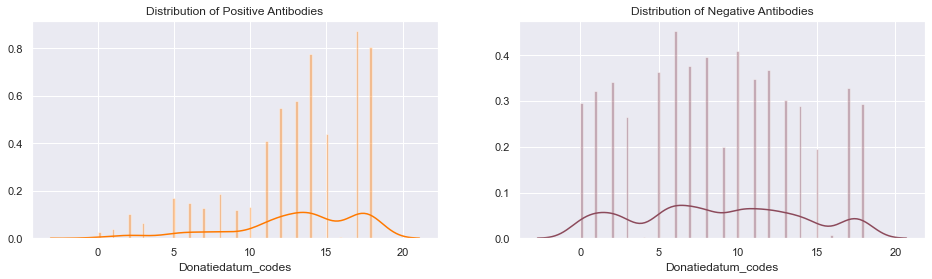

In [47]:
#plot for donation date, distributed by postive and negative antibodies
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(waves[(waves['Covid_result'] == 'pos')]['Donatiedatum_codes'], bins=100, color=('#ff7900'), ax=axs[0])
axs[0].set_title("Distribution of Positive Antibodies")

sns.distplot(waves[(waves['Covid_result'] == 'neg')]['Donatiedatum_codes'], bins=100, color=('#8c4a5b'), ax=axs[1])
axs[1].set_title("Distribution of Negative Antibodies")

def my_func(x):
    return dt.date



# Feature Selection 
Not all features are equally important, some of the features are irrelevant to the prediction. 

In [48]:
#make a list of seperate columns that can be deleted, these have no added value 
delete = ['Invuldatum', 'Donatiedatum', 'DonatieDatumEnq', 
           'DagenNaDonatie', 'Donatiesoortcode', 'DonatieStatusCode',
          'volume', 'StartDate', 'EndDate', 'ResponseType',
          'Duration__in_seconds_', 'DistributionChannel', 'DatumGetest',
         'Covid_result_repeat', 'Vervolgonderzoek', 'Afnamelocatie', 
         'HoeContact', 'BeginKlachten', 'EindKlachten', 'ArtsGeweest',
         'Getest', 'TweedeOnderzoek', 'Corona_ZonderKlachten', 'MinutenAandacht',
         'SocialeActiviteiten_Vermijden', 'WinkelsSluiten', 'EerlijkOverheid',
         'TotaleTijd', 'Progress', 'Finished', 'Opmerkingen', 'Huishouden_anders']

#make selection based on regex
for col in waves:
    if "Toestemming" in col or 'Akkoord' in col or 'Effectief' in col or 'Stelling' in col or 'Doneren' in col or 'Donor' in col or 'Vraag' in col or 'Bezorgd' in col or 'Vertrouwen' in col or 'Reactie' in col or 'Uitspraak' in col or 'Anders' in col:
        delete.append(col)

#delete columns from the dataset that are in the list
waves = waves[[col for col in waves.columns if col not in delete]]
    
#show new head
waves.head()


,KeyID,Geslacht,Leeftijd,Woonplaats,OD.CO,Covid_result,Huishouden,ThuiswonendeKinderen_0-3,ThuiswonendeKinderen_4-12,ThuiswonendeKinderen_13-17,ThuiswonendeKinderen_18+,HoogsteOpleiding,CruciaalBeroep,DirectContact,DirectContactMetCovid,NormaleWeek_Thuiswerken,NormaleWeek_Buitenshuiswerken,Normaleweek_Nietwerken,CoronaWeek_Thuiswerken,CoronaWeek_Buitenshuiswerk,CoronaWeek_Nietwerken,HoeveelPersonenContact,Klacht_Neusverkoudheid,Klacht_Keelpijn,Klacht_DrogeHoest,Klacht_Vermoedheid,Klacht_SlijmHoest,Klacht_SpierGewrichtspijn,Klacht_Hoofdpijn,Klacht_Koorts,Klacht_Kortademig,Klacht_Diarree,Klacht_Misselijkheid,Klacht_Overgeven,Klacht_Rillingen,Klacht_Niezen,Klacht_Huiduitslag,Klacht_Verward,Klacht_VerslapteSpieren,Klacht_GeenReukSmaak,RIVM_HandenWassen,RIVM_GrondigHandenWassen,RIVM_GeenHandenSchudden,RIVM_PapierZakdoek,RIVM_Elleboog,RIVM_ThuisblijvenSymptomen,RIVM_Thuiswerken,RIVM_1.5mAfstand,RIVM_VermijdenGroepen,Extra_Niets,Extra_OpenbaarVermijden,Extra_WinkelsVermijden,Extra_Schoonmaak,Extra_DesinfectieGebruik,Extra_DesinfectieGelDragen,Extra_Gezichtsmasker,Extra_Supplementen,Extra_ContactMinimaliseren,Extra_GezondEten,Donatiedatum_cat,Donatiedatum_codes
0,31689496.0,F,46.0,S-GRAVENHAGE,20.86,pos,4.0,0.0,0.0,2.0,1.0,5.0,1.0,NaN,NaN,1.0,4.0,2.0,5.0,0.0,2.0,NaN,1.0,1.0,5.0,5.0,3.0,3.0,2.0,5.0,4.0,1.0,1.0,1.0,5.0,2.0,1.0,1.0,2.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2020-05-18,10
1,28624260.0,M,35.0,HONSELERSDIJK,20.85,pos,4.0,0.0,2.0,0.0,0.0,4.0,5.0,2.0,NaN,0.0,5.0,2.0,0.0,5.0,2.0,30.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,4.0,4.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-14,8
2,75900241.0,M,65.0,VUGHT,20.85,pos,3.0,NaN,NaN,NaN,NaN,5.0,1.0,NaN,NaN,0.0,0.0,5.0,0.0,0.0,5.0,NaN,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2020-05-18,10
3,12772795.0,M,53.0,HUISSEN,20.83,pos,4.0,0.0,0.0,0.0,2.0,4.0,1.0,NaN,NaN,0.0,5.0,2.0,0.0,5.0,2.0,10.0,4.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,4.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2020-05-13,7
4,55244613.0,M,57.0,ZWOLLE,20.75,pos,3.0,NaN,NaN,NaN,NaN,4.0,4.0,2.0,NaN,0.0,5.0,2.0,0.0,5.0,2.0,20.0,1.0,4.0,4.0,4.0,1.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,4.0,1.0,1.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,6.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,2020-05-14,8


In [49]:
#map values for positive and negative
waves['Covid_result'] = waves['Covid_result'].map({'pos': 1, 'neg': 0})
waves['Covid_result'].value_counts(normalize=True)

0    0.852604
1    0.147396
Name: Covid_result, dtype: float64

### As we can now see clearly, the dataset is very imbalanced. There are a lot more patients who do NOT have antibodies
### Show the percentage of nulls by column

In [50]:
waves['Extra_DesinfectieGebruik'].value_counts()

1.0    4719
Name: Extra_DesinfectieGebruik, dtype: int64

In [51]:
waves_null_pct = waves.isna().mean().round(4) * 100

waves_null_pct.sort_values(ascending=False)

Extra_Niets                      95.31
Extra_Gezichtsmasker             87.74
DirectContactMetCovid            85.03
Extra_Supplementen               84.37
Extra_Schoonmaak                 75.92
ThuiswonendeKinderen_0-3         68.71
ThuiswonendeKinderen_4-12        67.86
ThuiswonendeKinderen_13-17       67.54
Extra_GezondEten                 67.13
Extra_DesinfectieGelDragen       66.10
ThuiswonendeKinderen_18+         65.23
Extra_WinkelsVermijden           59.50
DirectContact                    58.38
Extra_DesinfectieGebruik         53.72
HoeveelPersonenContact           44.42
Extra_OpenbaarVermijden          40.02
Klacht_Overgeven                 29.56
Klacht_Diarree                   29.56
Klacht_Kortademig                29.56
Klacht_Huiduitslag               29.56
Klacht_Rillingen                 29.56
Klacht_Misselijkheid             29.56
Klacht_GeenReukSmaak             29.55
Klacht_SpierGewrichtspijn        29.55
Klacht_Verward                   29.55
Klacht_Koorts            

There seem to be a lot of Null values in quite a lot of columns. Down below you find a plot of the distribution

Now we'll check for the variance in the different variables. When the variance is 0, it means there is only 1 value 

In [52]:
#now we'll check the variance
features = [col for col in waves.columns if col not in ['KeyID', 
                                                    'Geslacht',
                                                    'Leeftijd',
                                                    'Woonplaats']]

waves[features].var()

OD.CO                            3.701898e+01
Covid_result                     1.256830e-01
Huishouden                       1.495748e+00
ThuiswonendeKinderen_0-3         1.775122e-01
ThuiswonendeKinderen_4-12        7.592053e-01
ThuiswonendeKinderen_13-17       6.642342e-01
ThuiswonendeKinderen_18+         2.042648e+00
HoogsteOpleiding                 9.600256e-01
CruciaalBeroep                   1.236323e+01
DirectContact                    4.370773e-01
DirectContactMetCovid            7.797813e-01
NormaleWeek_Thuiswerken          1.436049e+00
NormaleWeek_Buitenshuiswerken    3.662280e+00
Normaleweek_Nietwerken           4.652586e+00
CoronaWeek_Thuiswerken           4.350358e+00
CoronaWeek_Buitenshuiswerk       4.210220e+00
CoronaWeek_Nietwerken            5.091059e+00
HoeveelPersonenContact           3.668864e+03
Klacht_Neusverkoudheid           9.368795e-01
Klacht_Keelpijn                  7.826922e-01
Klacht_DrogeHoest                9.433197e-01
Klacht_Vermoedheid               1

Some variables have a variance of 0. Let's check the answers in one of those columns

In [53]:
print(waves['Extra_ContactMinimaliseren'].value_counts())
print()
print(waves['Extra_GezondEten'].value_counts())

1.0    8773
Name: Extra_ContactMinimaliseren, dtype: int64

1.0    3352
Name: Extra_GezondEten, dtype: int64


When checking the value answers for these columns, I found it it were 'selected choice' answers. The columns have different distributions: 1 for 'yes I did this' and 0 for 'no I did not do this', but the 0 are replaced with Null values. Let's change that back to 0s

In [54]:
waves['Extra_OpenbaarVermijden'].fillna(value=0, inplace=True)
waves['Extra_WinkelsVermijden'].fillna(value=0, inplace=True)
waves['Extra_Schoonmaak'].fillna(value=0, inplace=True)
waves['Extra_DesinfectieGebruik'].fillna(value=0, inplace=True)
waves['Extra_Gezichtsmasker'].fillna(value=0, inplace=True)
waves['Extra_Supplementen'].fillna(value=0, inplace=True)
waves['Extra_ContactMinimaliseren'].fillna(value=0, inplace=True)
waves['Extra_GezondEten'].fillna(value=0, inplace=True)
waves['Extra_DesinfectieGelDragen'].fillna(value=0, inplace=True)

Let's check if this could also be the case for other variables

In [55]:
waves.isnull().sum()

KeyID                               0
Geslacht                            0
Leeftijd                            0
Woonplaats                          0
OD.CO                               0
Covid_result                        0
Huishouden                         31
ThuiswonendeKinderen_0-3         7006
ThuiswonendeKinderen_4-12        6920
ThuiswonendeKinderen_13-17       6887
ThuiswonendeKinderen_18+         6652
HoogsteOpleiding                   45
CruciaalBeroep                     59
DirectContact                    5953
DirectContactMetCovid            8670
NormaleWeek_Thuiswerken           236
NormaleWeek_Buitenshuiswerken     115
Normaleweek_Nietwerken            118
CoronaWeek_Thuiswerken            120
CoronaWeek_Buitenshuiswerk        114
CoronaWeek_Nietwerken             112
HoeveelPersonenContact           4530
Klacht_Neusverkoudheid           3008
Klacht_Keelpijn                  3007
Klacht_DrogeHoest                3008
Klacht_Vermoedheid               3011
Klacht_Slijm

In [56]:
#columns for which to change nan to 0

#in the following columns, I changed NaN to 0 (answer=no, but nothing is filled in )
waves.fillna({x:0 for x in [ 'ThuiswonendeKinderen_0-3', 'ThuiswonendeKinderen_4-12', 'ThuiswonendeKinderen_13-17', 'ThuiswonendeKinderen_18+', 
                                     'HoeveelPersonenContact', 'CoronaWeek_Thuiswerken', 'CoronaWeek_Buitenshuiswerk', 'CoronaWeek_Nietwerken',
                                   'NormaleWeek_Thuiswerken', 'NormaleWeek_Buitenshuiswerken', 'Normaleweek_Nietwerken',
                           ]}, inplace=True)

#
waves.fillna({x:7 for x in ['Huishouden']}, inplace=True)

#the following columns are changed to 1 (mostly 'no'). This is a big assumption
waves.fillna({x:1 for x in ['CruciaalBeroep',
                           ]}, inplace=True)

#the following columns are changed to 2 (mostly 'no'). This is a big assumption
waves.fillna({x:2 for x in ['DirectContact', 'DirectContactMetCovid',
                           ]}, inplace=True)

#change values for all columns with Klachten; 'helemaal geen klachten'
klachten = [col for col in waves if col.startswith('Klacht')]
waves[klachten] = waves[klachten].fillna(value=1)

#change values for all columns with RIVM; 'niet van toepassing'
RIVM = [col for col in waves if col.startswith('RIVM')]
waves[RIVM] = waves[RIVM].fillna(value=6)

#change values for all columns with Extra
extra = [col for col in waves if col.startswith('Extra')]
waves[extra] = waves[extra].fillna(value=0)

In [57]:
waves.isnull().sum()

KeyID                             0
Geslacht                          0
Leeftijd                          0
Woonplaats                        0
OD.CO                             0
Covid_result                      0
Huishouden                        0
ThuiswonendeKinderen_0-3          0
ThuiswonendeKinderen_4-12         0
ThuiswonendeKinderen_13-17        0
ThuiswonendeKinderen_18+          0
HoogsteOpleiding                 45
CruciaalBeroep                    0
DirectContact                     0
DirectContactMetCovid             0
NormaleWeek_Thuiswerken           0
NormaleWeek_Buitenshuiswerken     0
Normaleweek_Nietwerken            0
CoronaWeek_Thuiswerken            0
CoronaWeek_Buitenshuiswerk        0
CoronaWeek_Nietwerken             0
HoeveelPersonenContact            0
Klacht_Neusverkoudheid            0
Klacht_Keelpijn                   0
Klacht_DrogeHoest                 0
Klacht_Vermoedheid                0
Klacht_SlijmHoest                 0
Klacht_SpierGewrichtspijn   

In [58]:
#drop the rows where there are still NaN
waves = waves[waves['HoogsteOpleiding'].notna()]

Now, all the missing values have either been replaced, or deleted from the dataset. Let's see what we are working with now

In [59]:
waves.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10152 entries, 0 to 10196
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   KeyID                          10152 non-null  float64 
 1   Geslacht                       10152 non-null  object  
 2   Leeftijd                       10152 non-null  float64 
 3   Woonplaats                     10152 non-null  object  
 4   OD.CO                          10152 non-null  float64 
 5   Covid_result                   10152 non-null  int64   
 6   Huishouden                     10152 non-null  float64 
 7   ThuiswonendeKinderen_0-3       10152 non-null  float64 
 8   ThuiswonendeKinderen_4-12      10152 non-null  float64 
 9   ThuiswonendeKinderen_13-17     10152 non-null  float64 
 10  ThuiswonendeKinderen_18+       10152 non-null  float64 
 11  HoogsteOpleiding               10152 non-null  float64 
 12  CruciaalBeroep                 1

In [60]:
waves.head()

,KeyID,Geslacht,Leeftijd,Woonplaats,OD.CO,Covid_result,Huishouden,ThuiswonendeKinderen_0-3,ThuiswonendeKinderen_4-12,ThuiswonendeKinderen_13-17,ThuiswonendeKinderen_18+,HoogsteOpleiding,CruciaalBeroep,DirectContact,DirectContactMetCovid,NormaleWeek_Thuiswerken,NormaleWeek_Buitenshuiswerken,Normaleweek_Nietwerken,CoronaWeek_Thuiswerken,CoronaWeek_Buitenshuiswerk,CoronaWeek_Nietwerken,HoeveelPersonenContact,Klacht_Neusverkoudheid,Klacht_Keelpijn,Klacht_DrogeHoest,Klacht_Vermoedheid,Klacht_SlijmHoest,Klacht_SpierGewrichtspijn,Klacht_Hoofdpijn,Klacht_Koorts,Klacht_Kortademig,Klacht_Diarree,Klacht_Misselijkheid,Klacht_Overgeven,Klacht_Rillingen,Klacht_Niezen,Klacht_Huiduitslag,Klacht_Verward,Klacht_VerslapteSpieren,Klacht_GeenReukSmaak,RIVM_HandenWassen,RIVM_GrondigHandenWassen,RIVM_GeenHandenSchudden,RIVM_PapierZakdoek,RIVM_Elleboog,RIVM_ThuisblijvenSymptomen,RIVM_Thuiswerken,RIVM_1.5mAfstand,RIVM_VermijdenGroepen,Extra_Niets,Extra_OpenbaarVermijden,Extra_WinkelsVermijden,Extra_Schoonmaak,Extra_DesinfectieGebruik,Extra_DesinfectieGelDragen,Extra_Gezichtsmasker,Extra_Supplementen,Extra_ContactMinimaliseren,Extra_GezondEten,Donatiedatum_cat,Donatiedatum_codes
0,31689496.0,F,46.0,S-GRAVENHAGE,20.86,1,4.0,0.0,0.0,2.0,1.0,5.0,1.0,2.0,2.0,1.0,4.0,2.0,5.0,0.0,2.0,0.0,1.0,1.0,5.0,5.0,3.0,3.0,2.0,5.0,4.0,1.0,1.0,1.0,5.0,2.0,1.0,1.0,2.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2020-05-18,10
1,28624260.0,M,35.0,HONSELERSDIJK,20.85,1,4.0,0.0,2.0,0.0,0.0,4.0,5.0,2.0,2.0,0.0,5.0,2.0,0.0,5.0,2.0,30.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,4.0,4.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-05-14,8
2,75900241.0,M,65.0,VUGHT,20.85,1,3.0,0.0,0.0,0.0,0.0,5.0,1.0,2.0,2.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2020-05-18,10
3,12772795.0,M,53.0,HUISSEN,20.83,1,4.0,0.0,0.0,0.0,2.0,4.0,1.0,2.0,2.0,0.0,5.0,2.0,0.0,5.0,2.0,10.0,4.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2020-05-13,7
4,55244613.0,M,57.0,ZWOLLE,20.75,1,3.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,2.0,0.0,5.0,2.0,0.0,5.0,2.0,20.0,1.0,4.0,4.0,4.0,1.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,4.0,1.0,1.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,6.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2020-05-14,8


## Almost all the features are now floats, except for the target variable (Covid_result), and the donation date features we made for the plot. We can delete those now. 


In [61]:
waves.drop(['Donatiedatum_cat', 'Donatiedatum_codes'], axis=1, inplace=True)

In [62]:
#change Woonplaats and Geslacht stringt to integers

waves['Woonplaats'] = waves['Woonplaats'].astype('category')
waves['Woonplaats'] = waves['Woonplaats'].cat.codes

waves['Geslacht'] = waves['Geslacht'].astype('category')
waves['Geslacht'] = waves['Geslacht'].cat.codes

In [63]:
waves.head()

,KeyID,Geslacht,Leeftijd,Woonplaats,OD.CO,Covid_result,Huishouden,ThuiswonendeKinderen_0-3,ThuiswonendeKinderen_4-12,ThuiswonendeKinderen_13-17,ThuiswonendeKinderen_18+,HoogsteOpleiding,CruciaalBeroep,DirectContact,DirectContactMetCovid,NormaleWeek_Thuiswerken,NormaleWeek_Buitenshuiswerken,Normaleweek_Nietwerken,CoronaWeek_Thuiswerken,CoronaWeek_Buitenshuiswerk,CoronaWeek_Nietwerken,HoeveelPersonenContact,Klacht_Neusverkoudheid,Klacht_Keelpijn,Klacht_DrogeHoest,Klacht_Vermoedheid,Klacht_SlijmHoest,Klacht_SpierGewrichtspijn,Klacht_Hoofdpijn,Klacht_Koorts,Klacht_Kortademig,Klacht_Diarree,Klacht_Misselijkheid,Klacht_Overgeven,Klacht_Rillingen,Klacht_Niezen,Klacht_Huiduitslag,Klacht_Verward,Klacht_VerslapteSpieren,Klacht_GeenReukSmaak,RIVM_HandenWassen,RIVM_GrondigHandenWassen,RIVM_GeenHandenSchudden,RIVM_PapierZakdoek,RIVM_Elleboog,RIVM_ThuisblijvenSymptomen,RIVM_Thuiswerken,RIVM_1.5mAfstand,RIVM_VermijdenGroepen,Extra_Niets,Extra_OpenbaarVermijden,Extra_WinkelsVermijden,Extra_Schoonmaak,Extra_DesinfectieGebruik,Extra_DesinfectieGelDragen,Extra_Gezichtsmasker,Extra_Supplementen,Extra_ContactMinimaliseren,Extra_GezondEten
0,31689496.0,0,46.0,1,20.86,1,4.0,0.0,0.0,2.0,1.0,5.0,1.0,2.0,2.0,1.0,4.0,2.0,5.0,0.0,2.0,0.0,1.0,1.0,5.0,5.0,3.0,3.0,2.0,5.0,4.0,1.0,1.0,1.0,5.0,2.0,1.0,1.0,2.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28624260.0,1,35.0,467,20.85,1,4.0,0.0,2.0,0.0,0.0,4.0,5.0,2.0,2.0,0.0,5.0,2.0,0.0,5.0,2.0,30.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,4.0,4.0,6.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,75900241.0,1,65.0,1104,20.85,1,3.0,0.0,0.0,0.0,0.0,5.0,1.0,2.0,2.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,12772795.0,1,53.0,489,20.83,1,4.0,0.0,0.0,0.0,2.0,4.0,1.0,2.0,2.0,0.0,5.0,2.0,0.0,5.0,2.0,10.0,4.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,55244613.0,1,57.0,1244,20.75,1,3.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,2.0,0.0,5.0,2.0,0.0,5.0,2.0,20.0,1.0,4.0,4.0,4.0,1.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,4.0,1.0,1.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,6.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


In [64]:
#deleting these two variables because they have no correlation with the outcome
waves.drop(['OD.CO', 'KeyID'], axis=1, inplace=True)

In [65]:
waves.describe()

,Geslacht,Leeftijd,Woonplaats,Covid_result,Huishouden,ThuiswonendeKinderen_0-3,ThuiswonendeKinderen_4-12,ThuiswonendeKinderen_13-17,ThuiswonendeKinderen_18+,HoogsteOpleiding,CruciaalBeroep,DirectContact,DirectContactMetCovid,NormaleWeek_Thuiswerken,NormaleWeek_Buitenshuiswerken,Normaleweek_Nietwerken,CoronaWeek_Thuiswerken,CoronaWeek_Buitenshuiswerk,CoronaWeek_Nietwerken,HoeveelPersonenContact,Klacht_Neusverkoudheid,Klacht_Keelpijn,Klacht_DrogeHoest,Klacht_Vermoedheid,Klacht_SlijmHoest,Klacht_SpierGewrichtspijn,Klacht_Hoofdpijn,Klacht_Koorts,Klacht_Kortademig,Klacht_Diarree,Klacht_Misselijkheid,Klacht_Overgeven,Klacht_Rillingen,Klacht_Niezen,Klacht_Huiduitslag,Klacht_Verward,Klacht_VerslapteSpieren,Klacht_GeenReukSmaak,RIVM_HandenWassen,RIVM_GrondigHandenWassen,RIVM_GeenHandenSchudden,RIVM_PapierZakdoek,RIVM_Elleboog,RIVM_ThuisblijvenSymptomen,RIVM_Thuiswerken,RIVM_1.5mAfstand,RIVM_VermijdenGroepen,Extra_Niets,Extra_OpenbaarVermijden,Extra_WinkelsVermijden,Extra_Schoonmaak,Extra_DesinfectieGebruik,Extra_DesinfectieGelDragen,Extra_Gezichtsmasker,Extra_Supplementen,Extra_ContactMinimaliseren,Extra_GezondEten
count,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.00000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000,10152.000000
mean,0.518913,50.068361,572.248227,0.146769,3.239657,0.045016,0.185087,0.173119,0.289253,4.555063,2.666273,1.882289,1.944346,0.490032,3.268095,2.763741,1.666081,1.923237,2.920730,11.603723,1.529649,1.367612,1.367317,1.616923,1.217297,1.404551,1.515071,1.248818,1.235323,1.145489,1.106383,1.035362,1.201832,1.523936,1.103920,1.051024,1.146375,1.248818,1.979511,2.250887,1.235225,2.282309,1.689224,3.013396,3.610619,1.858156,1.415583,0.047084,0.60195,0.406619,0.241627,0.464441,0.340327,0.123128,0.157013,0.863475,0.330083
std,0.499667,14.156167,377.683575,0.353893,1.223434,0.245224,0.562971,0.527725,0.932288,0.979809,3.514291,0.449426,0.367044,1.188880,1.927894,2.162771,2.082802,2.050707,2.262204,46.416965,0.882690,0.780896,0.850416,1.053079,0.621159,0.871257,0.954780,0.775162,0.706362,0.486657,0.435032,0.280082,0.652167,0.817512,0.419616,0.310327,0.536013,0.835233,0.846611,1.003393,0.850822,1.645181,1.112369,2.253778,2.164357,0.831229,0.851711,0.211830,0.48952,0.491227,0.428091,0.498758,0.473842,0.328601,0.363831,0.343362,0.470266
min,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,40.000000,245.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,53.000000,553.000000,0.000000,3.000000,0

We can see that there is one outlier in 'HoeveelPersonenContact'. We will delete this row and afterwards, export the dataframe to a csv to work further on. 

In [66]:
#waves['HoeveelPersonenContact'].value_counts()

In [79]:
#waves['HoeveelPersonenContact'].value_counts()

In [73]:
waves = waves.drop(waves[waves.HoeveelPersonenContact > 300].index)
waves = waves.drop(waves[waves['ThuiswonendeKinderen_13-17'] > 10].index)
waves = waves.drop(waves[waves['ThuiswonendeKinderen_18+'] > 10].index)

In [72]:
waves.describe()

,Geslacht,Leeftijd,Woonplaats,Covid_result,Huishouden,ThuiswonendeKinderen_0-3,ThuiswonendeKinderen_4-12,ThuiswonendeKinderen_13-17,ThuiswonendeKinderen_18+,HoogsteOpleiding,CruciaalBeroep,DirectContact,DirectContactMetCovid,NormaleWeek_Thuiswerken,NormaleWeek_Buitenshuiswerken,Normaleweek_Nietwerken,CoronaWeek_Thuiswerken,CoronaWeek_Buitenshuiswerk,CoronaWeek_Nietwerken,HoeveelPersonenContact,Klacht_Neusverkoudheid,Klacht_Keelpijn,Klacht_DrogeHoest,Klacht_Vermoedheid,Klacht_SlijmHoest,Klacht_SpierGewrichtspijn,Klacht_Hoofdpijn,Klacht_Koorts,Klacht_Kortademig,Klacht_Diarree,Klacht_Misselijkheid,Klacht_Overgeven,Klacht_Rillingen,Klacht_Niezen,Klacht_Huiduitslag,Klacht_Verward,Klacht_VerslapteSpieren,Klacht_GeenReukSmaak,RIVM_HandenWassen,RIVM_GrondigHandenWassen,RIVM_GeenHandenSchudden,RIVM_PapierZakdoek,RIVM_Elleboog,RIVM_ThuisblijvenSymptomen,RIVM_Thuiswerken,RIVM_1.5mAfstand,RIVM_VermijdenGroepen,Extra_Niets,Extra_OpenbaarVermijden,Extra_WinkelsVermijden,Extra_Schoonmaak,Extra_DesinfectieGebruik,Extra_DesinfectieGelDragen,Extra_Gezichtsmasker,Extra_Supplementen,Extra_ContactMinimaliseren,Extra_GezondEten
count,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000,10143.000000
mean,0.518880,50.070492,572.134378,0.146702,3.239476,0.045056,0.185251,0.170512,0.286947,4.555556,2.664596,1.881889,1.944099,0.490072,3.267150,2.764517,1.667066,1.921197,2.921645,10.706694,1.529133,1.367544,1.366657,1.616780,1.216800,1.404417,1.515035,1.248842,1.235138,1.145519,1.106477,1.035394,1.201913,1.524007,1.104013,1.050971,1.146308,1.248546,1.979690,2.251011,1.234940,2.282757,1.689540,3.013211,3.609879,1.858030,1.414867,0.047028,0.602189,0.406783,0.241546,0.464261,0.340333,0.123041,0.156857,0.863650,0.330080
std,0.499668,14.158192,377.718518,0.353826,1.223469,0.245329,0.563194,0.492334,0.915429,0.980003,3.514667,0.448546,0.366636,1.189232,1.928334,2.163462,2.083126,2.049954,2.262892,30.011627,0.881857,0.780973,0.849409,1.052901,0.620133,0.871280,0.954881,0.775406,0.706353,0.486782,0.435214,0.280204,0.652384,0.817617,0.419791,0.310318,0.536103,0.834714,0.846875,1.003687,0.850321,1.645616,1.112724,2.253730,2.164350,0.831587,0.850617,0.211708,0.489470,0.491258,0.428042,0.498746,0.473845,0.328500,0.363684,0.343177,0.470265
min,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,40.000000,245.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,53.000000,552.000000,0.000000,3.000

In [80]:
#export dataframe to csv
cwd = os.getcwd()
waves.to_csv(cwd + "/waves_cleaned3003.csv", index=False)

# Correlation Among Explanatory Variables

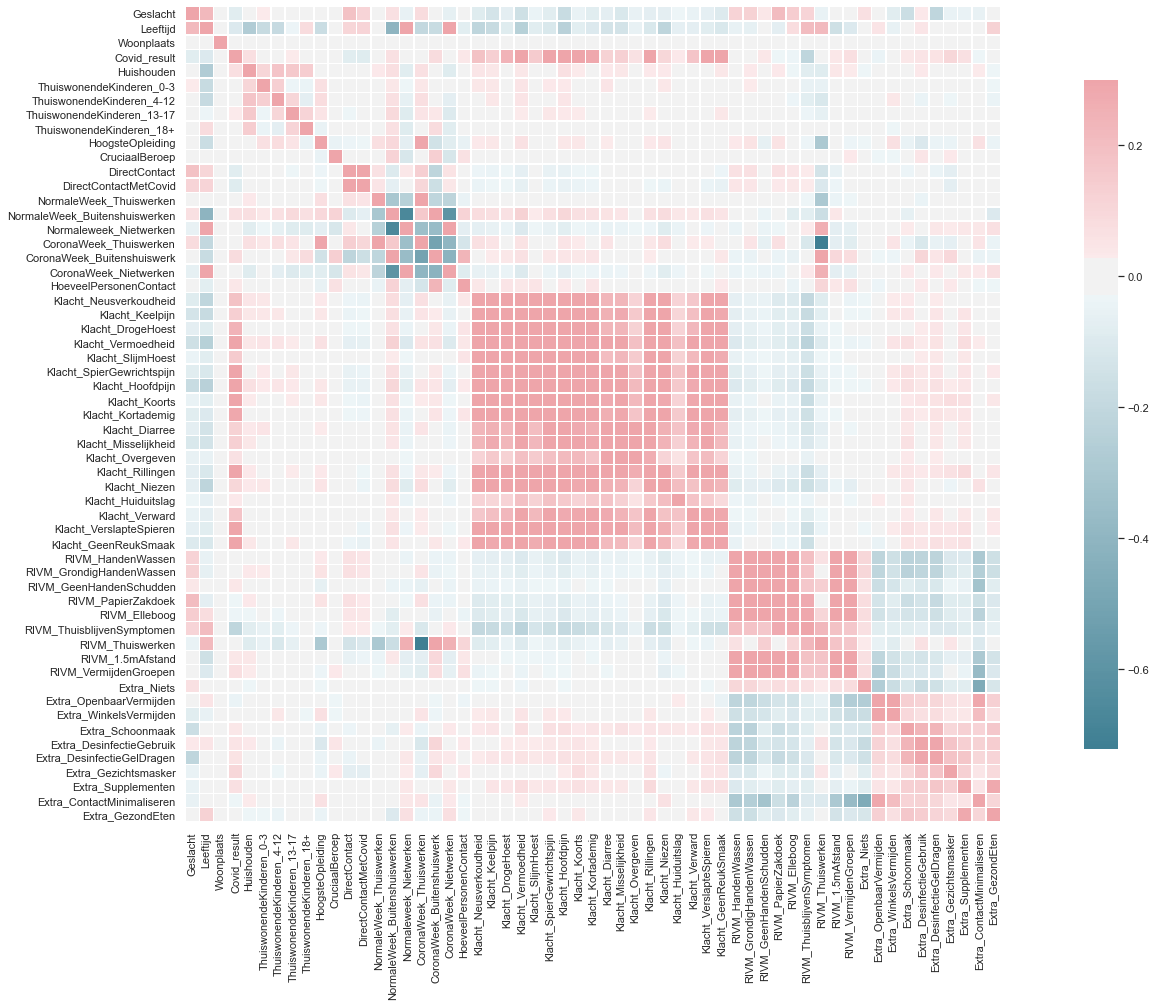

In [112]:
#show the correlation matrix with colors 
corr = waves.drop(['OD.CO', 'KeyID'], axis=1).corr()

plt.figure(figsize=(30,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .82})

plt.show()


#other way, different colors and with numbers in the matrix
    #corr = waves.corr()

    #plt.figure(figsize=(30,15))
    #sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.color_palette('RdBu_r'), 
     #       annot=True)

    #plt.show()

In [114]:
#show the correlation numbers with the Covid_result column only --> so for the dependent variable only
corr_covid_result = pd.DataFrame(corr['Covid_result'].drop('Covid_result'))
corr_covid_result.sort_values(by = 'Covid_result', ascending=False)
#print(corr["Covid_result"].sort_values(ascending=False))

,Covid_result
Klacht_GeenReukSmaak,0.525672
Klacht_Koorts,0.401937
Klacht_Vermoedheid,0.368165
Klacht_Rillingen,0.338169
Klacht_VerslapteSpieren,0.337513
Klacht_SpierGewrichtspijn,0.331074
Klacht_Hoofdpijn,0.311536
Klacht_Kortademig,0.288617
Klacht_DrogeHoest,0.242781
Klacht_Neusverkoudheid,0.185377


The variable 'Klacht_GeenReukSmaak' has the highest correlation with the Covid Resut (next to OD.CO, but this is the same..)

In [115]:
#waves[['Covid_result', 'Klacht_GeenReukSmaak']].corr()

In [116]:
waves.tail()

,KeyID,Geslacht,Leeftijd,Woonplaats,OD.CO,Covid_result,Huishouden,ThuiswonendeKinderen_0-3,ThuiswonendeKinderen_4-12,ThuiswonendeKinderen_13-17,ThuiswonendeKinderen_18+,HoogsteOpleiding,CruciaalBeroep,DirectContact,DirectContactMetCovid,NormaleWeek_Thuiswerken,NormaleWeek_Buitenshuiswerken,Normaleweek_Nietwerken,CoronaWeek_Thuiswerken,CoronaWeek_Buitenshuiswerk,CoronaWeek_Nietwerken,HoeveelPersonenContact,Klacht_Neusverkoudheid,Klacht_Keelpijn,Klacht_DrogeHoest,Klacht_Vermoedheid,Klacht_SlijmHoest,Klacht_SpierGewrichtspijn,Klacht_Hoofdpijn,Klacht_Koorts,Klacht_Kortademig,Klacht_Diarree,Klacht_Misselijkheid,Klacht_Overgeven,Klacht_Rillingen,Klacht_Niezen,Klacht_Huiduitslag,Klacht_Verward,Klacht_VerslapteSpieren,Klacht_GeenReukSmaak,RIVM_HandenWassen,RIVM_GrondigHandenWassen,RIVM_GeenHandenSchudden,RIVM_PapierZakdoek,RIVM_Elleboog,RIVM_ThuisblijvenSymptomen,RIVM_Thuiswerken,RIVM_1.5mAfstand,RIVM_VermijdenGroepen,Extra_Niets,Extra_OpenbaarVermijden,Extra_WinkelsVermijden,Extra_Schoonmaak,Extra_DesinfectieGebruik,Extra_DesinfectieGelDragen,Extra_Gezichtsmasker,Extra_Supplementen,Extra_ContactMinimaliseren,Extra_GezondEten
10192,99931053.0,0,52.0,926,19.674000,1,2.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,1.0,0.0,5.0,2.0,0.0,5.0,2.0,30.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,6.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10193,99940913.0,0,52.0,972,19.826000,1,4.0,0.0,0.0,1.0,2.0,4.0,2.0,2.0,2.0,0.0,3.0,4.0,0.0,3.0,4.0,5.0,1.0,2.0,1.0,4.0,1.0,3.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,6.0,1.0,1.0,6.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
10194,99944071.0,1,46.0,53,0.031579,0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,2.0,0.0,5.0,2.0,0.0,5.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
10195,99976983.0,0,56.0,280,19.442000,1,3.0,0.0,0.0,0.0,0.0,4.0,2.0,2.0,2.0,0.0,4.0,3.0,0.0,4.0,3.0,15.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10196,99977646.0,0,51.0,292,19.616000,1,2.0,0.0,0.0,1.0,1.0,6.0,2.0,1.0,1.0,1.0,4.0,2.0,1.0,4.0,2.0,25.0,2.0,1.0,1.0,5.0,1.0,4.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
